# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import statsmodels.api as sm

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1-5)**2))
X = sm.add_constant(X)
beta = [5., 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1326.
Date:                Tue, 17 Dec 2019   Prob (F-statistic):           1.18e-44
Time:                        23:39:41   Log-Likelihood:                 8.4408
No. Observations:                  50   AIC:                            -8.882
Df Residuals:                      46   BIC:                            -1.234
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8426      0.073     66.676      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.29539098  4.80736761  5.27727471  5.67604936  5.98511733  6.19944471
  6.32836499  6.3940456   6.42784586  6.46516473  6.53962487  6.6775485
  6.8936328   7.18853511  7.54876503  7.94890079  8.35576599  8.7338804
  9.05128925  9.2848133   9.42385717  9.47215005  9.44713309  9.37709381
  9.29651856  9.24042651  9.23861612  9.31076928  9.46321769  9.68790257
  9.96369866 10.25988507 10.54119263 10.77359851 10.92991608 10.9942616
 10.96466386 10.85338805 10.68492063 10.49194626 10.30997784 10.17152178
 10.10073735 10.10946733 10.19529231 10.34192817 10.52190155 10.70106359
 10.84420053 10.92081924]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5,25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n-5)**2))
Xnew = sm.add_constant(Xnew)
ynewpred =  olsres.predict(Xnew) # predict out of sample
print(ynewpred)

[10.89466562 10.72741816 10.43998979 10.08003848  9.71029886  9.39322261
  9.17568813  9.07752305  9.08664973  9.16204231]


## Plot comparison

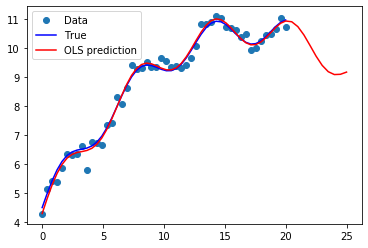

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, 'o', label="Data")
ax.plot(x1, y_true, 'b-', label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), 'r', label="OLS prediction")
ax.legend(loc="best");

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1" : x1, "y" : y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.842590
x1                  0.525808
np.sin(x1)          0.533273
I((x1 - 5) ** 2)   -0.021888
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.894666
1    10.727418
2    10.439990
3    10.080038
4     9.710299
5     9.393223
6     9.175688
7     9.077523
8     9.086650
9     9.162042
dtype: float64